In [9]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [11]:
X_train.shape


(60000, 28, 28)

In [12]:
X_test.shape


(10000, 28, 28)

In [13]:
single_image= X_train[0]


In [14]:
single_image.shape


(28, 28)

YOHESH KUMAR: 212222240118


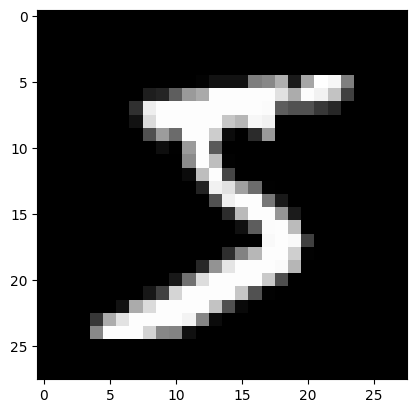

In [15]:
plt.imshow(single_image,cmap='gray')
print("YOHESH KUMAR: 212222240118")

In [16]:
y_train.shape


(60000,)

In [17]:
X_train.min()


0

In [18]:
X_train.max()


255

In [19]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [20]:
X_test_scaled = X_test/255.0


In [21]:
X_train_scaled.max()


1.0

In [22]:
y_train[0]


5

In [23]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [24]:
type(y_train_onehot)


numpy.ndarray

In [25]:
y_train_onehot.shape


(60000, 10)

YOHESH KUMAR: 212222240118


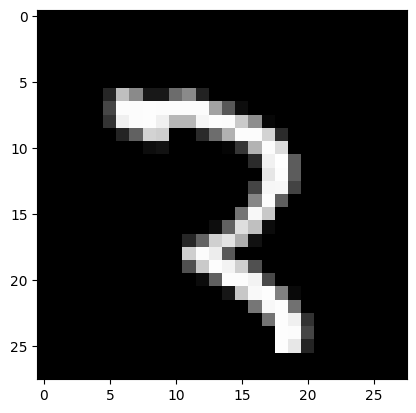

In [26]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')
print("YOHESH KUMAR: 212222240118")

In [27]:
y_train_onehot[500]


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [28]:

X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [29]:
model = keras.Sequential()
model.add (layers.Input (shape=(28,28,1)))
model.add (layers.Conv2D (filters=32, kernel_size=(3,3), activation='relu'))
model.add (layers.MaxPool2D (pool_size=(2,2)))
model.add (layers. Flatten())
model.add (layers.Dense (32, activation='relu'))
model.add (layers.Dense (25, activation='relu'))
model.add (layers.Dense (10, activation='softmax'))

In [30]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 25)                825       
                                                                 
 dense_2 (Dense)             (None, 10)                260       
                                                        

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [32]:

model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))


Epoch 1/5
938/938 [==============================] - 24s 25ms/step - loss: 0.2862 - accuracy: 0.9143 - val_loss: 0.1094 - val_accuracy: 0.9656
Epoch 2/5
938/938 [==============================] - 22s 24ms/step - loss: 0.0929 - accuracy: 0.9723 - val_loss: 0.0765 - val_accuracy: 0.9760
Epoch 3/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0653 - accuracy: 0.9809 - val_loss: 0.0627 - val_accuracy: 0.9805
Epoch 4/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0521 - accuracy: 0.9846 - val_loss: 0.0588 - val_accuracy: 0.9811
Epoch 5/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0425 - accuracy: 0.9871 - val_loss: 0.0535 - val_accuracy: 0.9828


In [33]:
metrics = pd.DataFrame(model.history.history)


In [34]:
metrics.head()


,loss,accuracy,val_loss,val_accuracy
0,0.286153,0.914250,0.109412,0.9656
1,0.092896,0.972300,0.076533,0.9760
2,0.065303,0.980917,0.062727,0.9805
3,0.052071,0.984617,0.058792,0.9811
4,0.042474,0.987067,0.053502,0.9828


YOHESH KUMAR: 212222240118


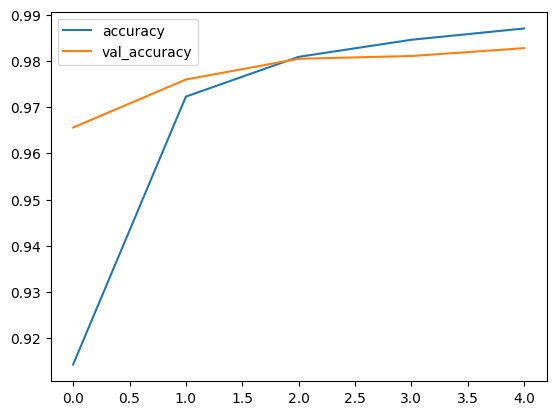

In [35]:
metrics[['accuracy','val_accuracy']].plot()
print("YOHESH KUMAR: 212222240118")


YOHESH KUMAR: 212222240118


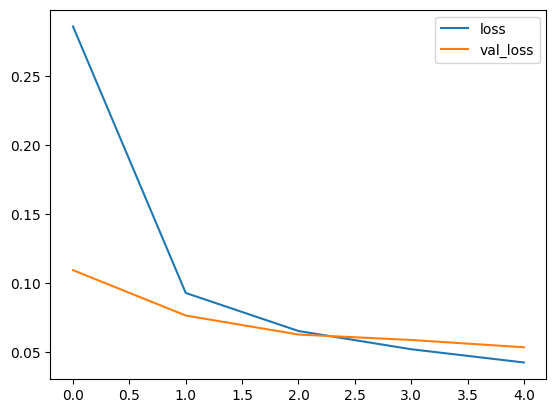

In [36]:
metrics[['loss','val_loss']].plot()
print("YOHESH KUMAR: 212222240118")


In [37]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)


313/313 [==============================] - 1s 4ms/step


In [38]:
print("YOHESH KUMAR: 212222240118")
print(confusion_matrix(y_test,x_test_predictions))


YOHESH KUMAR: 212222240118
[[ 970    0    1    1    1    0    2    0    5    0]
 [   0 1129    1    1    1    0    1    0    2    0]
 [   3    4 1000    2    3    0    0    9   10    1]
 [   0    0    1 1001    0    1    0    0    7    0]
 [   0    0    0    0  975    0    3    0    1    3]
 [   2    0    0   11    0  867    3    1    6    2]
 [   5    3    0    1    1    2  943    0    3    0]
 [   1    4    7    1    1    0    0 1005    3    6]
 [   1    0    0    2    1    1    0    3  959    7]
 [   2    4    0    3   12    1    0    3    5  979]]


In [39]:
print(classification_report(y_test,x_test_predictions))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [42]:
img = image.load_img('/content/image8.jpg')


In [ ]:
type(img)


In [45]:
img = image.load_img('/content/image8.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [46]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 33ms/step


In [48]:
print(x_single_prediction)
print("YOHESH KUMAR: 212222240118")

[8]
YOHESH KUMAR: 212222240118


YOHESH KUMAR: 212222240118


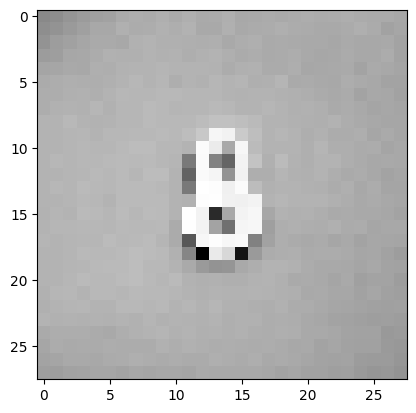

In [49]:
print("YOHESH KUMAR: 212222240118")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')




In [52]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [54]:

x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)


1/1 [==============================] - 0s 31ms/step


In [55]:
print(x_single_prediction)


[6]
